### DOWNLOAD THE 'CHORD-SCALE PACK (OR dataset)' FROM FREESOUND

In [1]:
import sys,os
sys.path.append(os.path.join(os.path.dirname('__file__'), 'freesound-python/'))

import freesound
client = freesound.FreesoundClient()
client.set_token("1Dio5sf5Kq7uxPPi4WSQljr4EncEzRjuVdlMV8z8","token")

from utilities import *

params=AnalysisParams(200,100,'hann',2048,44100,12)
numBins = params.numBins

audioDir = 'audio/'
annotationsDir = 'scale_annotations/'
dataDir = 'data/'

In [4]:
pack = client.get_pack(24075)
print("Pack name:", pack.name)
results_pager = pack.get_sounds(
    page_size=41,
    fields="id,name,username,duration,previews"
)

print("Num results:", results_pager.count)


if os.path.exists(audioDir) != 1:
    os.mkdir(audioDir)
os.chdir(audioDir)    
for sound in results_pager:
    print(sound)
    print("\t-", sound.name, "by", sound.username, ", with duration of",)
    print(sound.duration, "s ",)
    sound.retrieve_preview(".",sound.name+".mp3")
    #os.rename(sound.name+".mp3",queryStr+"_"+str(cnt)+".mp3")
    
print(sound.duration, "s ",)

print("Files are copied! check your folder")
os.chdir('..')

Pack name: Chord-Scale Dataset
Num results: 41
<Sound: id="424916", name="toprak_major2.aiff">
	- toprak_major2.aiff by emirdemirel , with duration of
47.7013 s 
<Sound: id="424915", name="toprak_major.aiff">
	- toprak_major.aiff by emirdemirel , with duration of
11.6245 s 
<Sound: id="424914", name="toprak_lydianb7.aiff">
	- toprak_lydianb7.aiff by emirdemirel , with duration of
59.2536 s 
<Sound: id="424913", name="toprak_lydianb71.aiff">
	- toprak_lydianb71.aiff by emirdemirel , with duration of
95.7651 s 
<Sound: id="424912", name="toprak_lydian1.aiff">
	- toprak_lydian1.aiff by emirdemirel , with duration of
66.9541 s 
<Sound: id="424911", name="toprak_lydian2.aiff">
	- toprak_lydian2.aiff by emirdemirel , with duration of
73.3138 s 
<Sound: id="424910", name="toprak_melmin.aiff">
	- toprak_melmin.aiff by emirdemirel , with duration of
117.707 s 
<Sound: id="424909", name="toprak_altered1.aiff">
	- toprak_altered1.aiff by emirdemirel , with duration of
70.9846 s 
<Sound: id="42490

In [3]:
dataDict = createDataStructure(annotationsDir,numBins)

### FEATURE EXTRACTION

In [21]:
for fileName,parts in dataDict.items():
    #print(fileName)
    for part in parts:
        computeHPCPFeatures(part,params,numBins)
        computeGlobHPCP(part)
        
#Saving all results in a pickle file

    pickleProtocol=1#choosen for backward compatibility
    with open('ExtractedFeatures_for'+str(numBins)+'bins!.pkl' , 'wb') as f:
        pickle.dump(dataDict, f, pickleProtocol)

#Let's clear data and re-read it
print('Features extracted and saved in a file')                

Features extracted and saved in a file


In [22]:
generateCSV('ExtractedFeatures_for12bins!.pkl',dataDir)        

This process might take a while (5-10 min) 
 CROSS-VALIDATION & TRAINING 
Accuracy score for the Feature Set : 
F-measure (mean,std) --- FINAL
0.75 0.0582178534305
Accuracy (mean,std) FINAL
0.77 0.0507543101618
['altered', 'dorian', 'hminor', 'hwdiminished', 'locrian', 'lydian', 'lydianb7', 'major', 'minor', 'mixolydian', 'mminor', 'phrygian']
Confusion matrix, without normalization


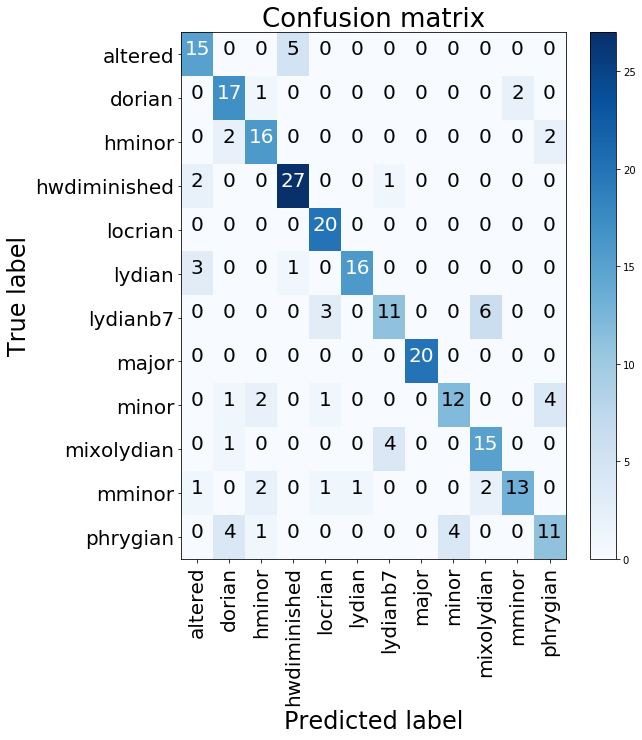

In [23]:
Classification('CSVfilefor_12bins.csv', dataDir)

In [2]:
fileDir = 'chord-scale_exercise/'
abc = FeatureExtraction_single('scalesexercise_solo1.mp3',fileDir,params,'exercise.json')

In [3]:
trained =TrainANDPredict('mycsvfile.csv','CSVfilefor_12bins.csv','chord-scale_exercise/')

In [5]:
trained

array(['major', 'phyrgian', 'major', 'dorian', 'lydian', 'minor'], dtype=object)